In [1]:
import os
import glob

#dataset
import pandas as pd
import numpy as np

#umap
from umap import UMAP, plot

#utils
from src.data.dataset import create_dataset
from src.features.feature_selection import use_umap, normalize_df

In [2]:
# PARSER FOR LYMPHOMA .BREAKAGE FILES
# directory = '../data/Lymphoma/control'
#
# for file in glob.glob(os.path.join(directory, '*.breakage')):
#     with open(file) as f:
#         content = f.read()
#     content = content.replace('chr', '')
#     with open(file, 'w') as f:
#         f.write(content)


In [3]:
folder = '../data/'
cancer_types = ["Breast_Cancer", "Hepatocarcinoma", "Lymphoma", "Meduloblastoma", "Prostate_Cancer"]

dataframes = []
list_target = []
list_cancer_type = []
for cancer in cancer_types:
    df, df_control, df_cancer = create_dataset(folder + cancer)
    dataframes.append(df)
    list_target.append([0]*df_control.shape[1])
    list_target.append([1]*df_cancer.shape[1])
    list_cancer_type.append([cancer]*(df_control.shape[1]+df_cancer.shape[1]))

df_full = pd.concat(dataframes, axis=1).dropna()

target = [t for l in list_target for t in l]
cancer_type = [c for l in list_cancer_type for c in l]

In [4]:
df_final = df_full.T

df_final["cancer_type"] = cancer_type
df_final["Target"] = target

# df_final.to_csv("all_cancer.csv", index=False)

<AxesSubplot:>

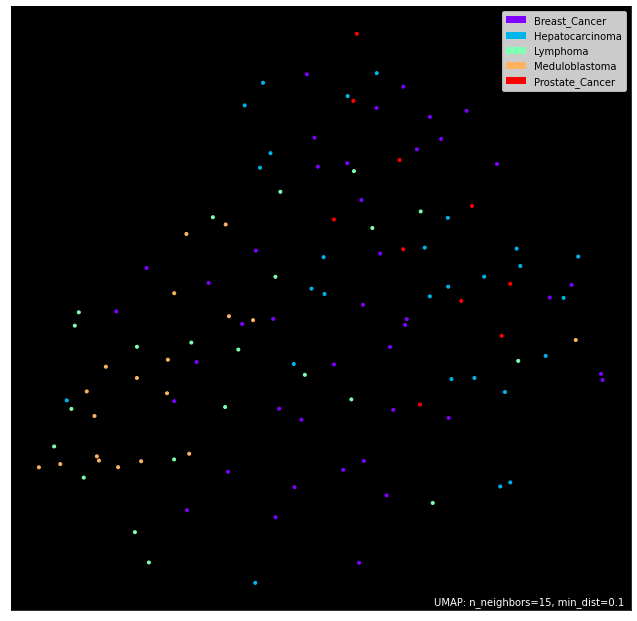

In [14]:
normalized_df = normalize_df(df_full.T)
umap_embedding = use_umap(normalized_df)
plot.points(umap_embedding, labels=df_final.cancer_type, theme='darkblue')